#  MACHINE LEARNING MODEL TO PREDICT MALE AND FEMALE BASED ON VOICE



In [5]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


# Import dataset 

In [6]:
my_data=pd.read_csv('Downloads/voice.csv')
my_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
my_data.shape

(3168, 21)

## 1)Remove/Null value handling 

In [8]:
my_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
my_data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [10]:
a = my_data.label.value_counts( )
print(a)
print("TOTAL: ", my_data.label.count( ))

male      1584
female    1584
Name: label, dtype: int64
TOTAL:  3168


# 2) Depict percentage distribution of label on a piechart

Text(0.5, 1.0, 'LABEL PERCENTAGE DISTRIBUTION')

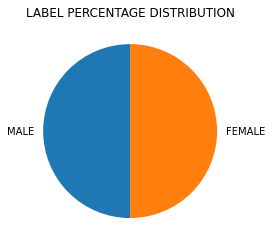

In [11]:
values=my_data.label.value_counts()
names=["MALE","FEMALE"]
plt.pie(values,labels=names,startangle=90)
plt.title('LABEL PERCENTAGE DISTRIBUTION')

Text(0.5, 1.0, 'LABEL PERCENTAGE DISTRIBUTION')

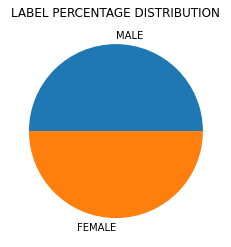

In [12]:
values=my_data.label.value_counts()
names=["MALE","FEMALE"]
plt.pie(values,labels=names)
plt.title("LABEL PERCENTAGE DISTRIBUTION")

## CORRELATION

In [13]:
my_data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [14]:
my_data.label=[1 if each=="female" else 0 for each in my_data.label]
my_data.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

## 3)Considering all the features as indepedent feature and label as dependent feature, split the dataset training and testing data with test size = 20%

In [15]:
x=my_data.drop(['label'],axis='columns')
y=my_data.label.values
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [16]:
x_train.shape

(2534, 20)

In [17]:
x_test.shape

(634, 20)

In [18]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1285,0.180714,0.067019,0.182244,0.129526,0.243691,0.114165,0.689342,2.683593,0.956978,0.635466,0.273716,0.180714,0.129325,0.047013,0.275862,1.340242,0.023438,9.070312,9.046875,0.102862
2444,0.200792,0.047447,0.208073,0.193945,0.220917,0.026972,2.694657,10.230447,0.860974,0.355232,0.194373,0.200792,0.167504,0.049030,0.279070,1.385156,0.093750,9.328125,9.234375,0.135575
2109,0.187027,0.033105,0.186575,0.172877,0.206301,0.033425,2.478694,9.649888,0.842026,0.237815,0.185479,0.187027,0.176057,0.017112,0.275862,0.905349,0.156250,6.695312,6.539062,0.227861
1690,0.164855,0.087690,0.200572,0.073087,0.235614,0.162527,1.178504,3.783360,0.951301,0.668715,0.199571,0.164855,0.203223,0.062500,0.258065,0.441964,0.023438,1.078125,1.054688,0.266097
3016,0.202837,0.040050,0.207027,0.193333,0.221261,0.027928,3.092712,13.645500,0.847150,0.257366,0.193514,0.202837,0.186564,0.015625,0.222222,0.810547,0.195312,3.886719,3.691406,0.216931


In [19]:
x_train.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1865,0.151755,0.089441,0.198520,0.059344,0.225837,0.166493,2.603043,13.204733,0.950413,0.681699,0.214298,0.151755,0.212683,0.054054,0.275862,0.784180,0.015625,3.585938,3.570312,0.282422
1658,0.148951,0.084412,0.177818,0.061731,0.216584,0.154853,2.486141,14.315189,0.964991,0.754474,0.211106,0.148951,0.199269,0.017241,0.258065,0.243359,0.007812,0.664062,0.656250,0.375313
1178,0.201380,0.063681,0.239343,0.135758,0.257374,0.121616,2.118607,7.055204,0.851474,0.250528,0.251717,0.201380,0.136432,0.050955,0.274286,1.918720,0.023438,9.281250,9.257812,0.096633
316,0.157601,0.061523,0.155399,0.103868,0.206930,0.103063,2.080085,7.696512,0.933424,0.549759,0.200086,0.157601,0.109531,0.014205,0.243902,1.152981,0.458984,3.969727,3.510742,0.361348
899,0.190852,0.053774,0.187133,0.147000,0.250133,0.103133,1.180835,3.443147,0.896658,0.314299,0.147000,0.190852,0.130284,0.047761,0.272727,0.375000,0.023438,0.609375,0.585938,0.194872


## 4)Apply the following classifier models on training dataset and generate predictions for the test dataset  

### a. Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
M1=DecisionTreeClassifier()
M1.fit(x_train,y_train)
print("Decisionn Tree Classification Score is " ,M1.score(x_test,y_test))
pred1=M1.predict(x_test)


Decisionn Tree Classification Score is  0.9763406940063092


### b. Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
M2=RandomForestClassifier()
M2.fit(x_train,y_train)
print("Random Forest Classfier Score is ",M2.score(x_test,y_test))
pred2=M2.predict(x_test)

Random Forest Classfier Score is  0.9810725552050473


### c. KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
M3=KNeighborsClassifier()
M3.fit(x_train,y_train)
print("KNeighbors Classification Score is ",M3.score(x_test,y_test))
pred3=M3.predict(x_test)


KNeighbors Classification Score is  0.6892744479495269


### d. Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression
M4= LogisticRegression(max_iter=1000)
M4.fit(x_train,y_train)
print("Logistic Regression Classification Score is ",M4.score(x_test,y_test))
pred4=M4.predict(x_test)


Logistic Regression Classification Score is  0.8990536277602523


### e. SVM Classifier

In [24]:
from sklearn.svm import SVC
M5=SVC()
M5.fit(x_train,y_train)
print("SVM Classification Score is ",M5.score(x_test,y_test))
pred5=M5.predict(x_test)

SVM Classification Score is  0.6356466876971609


## 5) CONFUSION MATRIX AND CLASSIFICATION REPORT

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
def eval_metrics(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

### CONFUSION MATRIX for Decision Tree Classifier 

In [27]:
eval_metrics(y_test,pred1)

[[301  10]
 [  5 318]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       311
           1       0.97      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### CONFUSION MATRIX for Random Forest Classifier

In [28]:
eval_metrics(y_test,pred2)

[[303   8]
 [  4 319]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       311
           1       0.98      0.99      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### CONFUSION MATRIX for KNN Classifier

In [29]:
eval_metrics(y_test,pred3)

[[225  86]
 [111 212]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       311
           1       0.71      0.66      0.68       323

    accuracy                           0.69       634
   macro avg       0.69      0.69      0.69       634
weighted avg       0.69      0.69      0.69       634



### CONFUSION MATRIX for Logistic Regression

In [30]:
eval_metrics(y_test,pred4)

[[298  13]
 [ 51 272]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       311
           1       0.95      0.84      0.89       323

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634



### CONFUSION MATRIX for SVM Classifier

In [35]:
eval_metrics(y_test,pred5)

[[240  71]
 [160 163]]
              precision    recall  f1-score   support

           0       0.60      0.77      0.68       311
           1       0.70      0.50      0.59       323

    accuracy                           0.64       634
   macro avg       0.65      0.64      0.63       634
weighted avg       0.65      0.64      0.63       634



## 6) Report the with the best accuracy

#### Decision Tree Classifier and Random Forest Classifier are the models with best accuracy . Whereas Logistic Regression model  has good accuracy .  KNN Classifier and  SVM Classifier models do not have good accuracy.

#### Hence, we can conclude that Decision Tree Classifier and Random Forest Classifier are the models that have  best accuracy by the help of confusion_matrix and classification report for the given data

##  

#  

#  